In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] =42
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches


In [2]:
df_colors = pd.read_csv("colors.csv")
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
df_parts = pd.read_csv("parts.csv")
df_parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [4]:
df_partcat = pd.read_csv("part_categories.csv")
df_partcat.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [5]:
df_sets = pd.read_csv("sets.csv")
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [6]:
df_themes = pd.read_csv("themes.csv")
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [7]:
df_inv = pd.read_csv("inventories.csv")
df_inv.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [8]:
df_invparts = pd.read_csv("inventory_parts.csv")
df_invparts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [9]:
df_invsets = pd.read_csv("inventory_sets.csv")
df_invsets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


## Colors introduced every year

In [10]:
df_par_color = df_invparts.merge(df_colors, left_on='color_id', right_on='id', how='outer')

In [11]:
df_par_color.head()

,inventory_id,part_num,color_id,quantity,is_spare,id,name,rgb,is_trans
0,1.0,48379c01,72.0,1.0,f,72,Dark Bluish Gray,6C6E68,f
1,22.0,15573,72.0,1.0,f,72,Dark Bluish Gray,6C6E68,f
2,22.0,2654,72.0,4.0,f,72,Dark Bluish Gray,6C6E68,f
3,22.0,3070b,72.0,1.0,f,72,Dark Bluish Gray,6C6E68,f
4,22.0,3070b,72.0,1.0,t,72,Dark Bluish Gray,6C6E68,f


In [12]:
df_inv_set = df_inv.merge(df_sets, left_on='set_num', right_on='set_num', how='outer')

In [13]:
df_inv_set.head()

,id,version,set_num,name,year,theme_id,num_parts
0,1.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,3.0,1.0,3931-1,Emma's Splash Pool,2012,494,43
2,4.0,1.0,6942-1,Zo Weevil,1999,134,20
3,15.0,1.0,5158-1,"T-Junction, Circle Plates",1990,454,2
4,16.0,1.0,903-1,Train Wheels and Couplers,1969,371,10


In [14]:
df_full_color = df_par_color.merge(df_inv_set, left_on='inventory_id', right_on='id', how='outer')

In [15]:
df_full_color.head()

,inventory_id,part_num,color_id,quantity,is_spare,id_x,name_x,rgb,is_trans,id_y,version,set_num,name_y,year,theme_id,num_parts
0,1.0,48379c01,72.0,1.0,f,72.0,Dark Bluish Gray,6C6E68,f,1.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,1.0,48395,7.0,1.0,f,7.0,Light Gray,9BA19D,f,1.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
2,1.0,mcsport6,25.0,1.0,f,25.0,Orange,FE8A18,f,1.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
3,1.0,paddle,0.0,1.0,f,0.0,Black,05131D,f,1.0,1.0,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
4,22.0,15573,72.0,1.0,f,72.0,Dark Bluish Gray,6C6E68,f,22.0,1.0,30277-1,First Order Star Destroyer,2016,184,56


In [16]:
df_full_color.groupby('year')['rgb'].value_counts()

year  rgb   
1950  C91A09     8
      F2CD37     8
      FFFFFF     8
      0055BF     6
      237841     6
      4B9F4A     2
      5A93DB     2
      C2DAB8     2
      FCFCFC     2
      FFA70B     2
1953  FFFFFF     6
      C91A09     5
      237841     3
      F2CD37     3
      0055BF     1
1954  C91A09    35
      FFFFFF    28
      F2CD37    16
      0055BF    13
      237841     4
      9BA19D     1
      FCFCFC     1
1955  FFFFFF    93
      C91A09    53
      F2CD37    19
      0055BF    18
      237841     6
      FCFCFC     3
      05131D     1
1956  FFFFFF    52
                ..
2017  0020A0    76
      6074A1    73
      E1D5ED    68
      84B68D    58
      ADC3C0    56
      9FC3E9    55
      DF6695    53
      A5A5CB    51
      D9E4A7    51
      9B9A5A    50
      A0BCAC    46
      DFEEA5    39
      FFF03A    33
      0033B2    29
      F8F184    25
      A5A9B4    18
      D09168    12
      DBAC34    12
      68BCC5    10
      CFE2F7     9
      8E5597     3

In [17]:
df_num = pd.DataFrame(df_full_color.groupby('year')['rgb'].value_counts())

In [18]:
df_num.to_csv("colors_year.csv")

In [19]:
# COLORS THAT APPEAR 
# COLOR THAT DISAPPEAR

In [20]:
df_col_test = pd.read_csv("colors_plot2.csv")
df_col_test.head()

,year,rgb,frequency this year,other year appearances
0,1950,C91A09,8,NaN
1,1950,F2CD37,8,NaN
2,1950,FFFFFF,8,NaN
3,1950,0055BF,6,NaN
4,1950,237841,6,NaN


In [21]:
df_col_uniq = df_col_test.merge(df_colors, left_on='rgb', right_on='rgb', how='left')

In [22]:
pd.options.display.max_rows = 999
df_col_uniq.to_csv("colors_year_uniq.csv")

In [25]:
df_full_color.groupby('year')['rgb'].nunique()

year
1950    10
1953     5
1954     7
1955     7
1956     5
1957    10
1958     9
1959     7
1960     7
1961    10
1962    10
1963     6
1964     8
1965     7
1966     9
1967     8
1968     8
1969    11
1970     9
1971     8
1972     9
1973     8
1974    11
1975    10
1976    10
1977    10
1978    13
1979    14
1980    15
1981    14
1982    18
1983    16
1984    15
1985    20
1986    17
1987    17
1988    18
1989    17
1990    18
1991    19
1992    21
1993    27
1994    27
1995    31
1996    32
1997    36
1998    39
1999    47
2000    49
2001    63
2002    68
2003    82
2004    84
2005    90
2006    79
2007    62
2008    56
2009    58
2010    63
2011    67
2012    67
2013    64
2014    65
2015    67
2016    69
2017    69
Name: rgb, dtype: int64

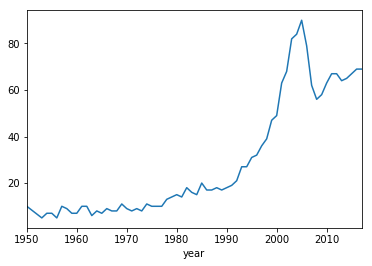

In [27]:
df_full_color.groupby('year')['rgb'].nunique().plot()